    CRIM：人均犯罪率

    ZN：25,000 毫米以上民用土地的比例

    INDUS：城鎮非零售業商業土地比例

    CHAS：是否鄰近查爾斯河，1 是鄰近，0 是不鄰近

    NOX：一氧化氮濃度（千萬分之一）

    RM：住宅的平均房間數

    AGE：自住且建於 1940 年前的房屋比例

    DIS：到 5 個波士頓就業中心的延長距離

    RAD：到高速公路的便捷度指數

    TAX：每萬元的財產稅率

    PTRATIO：城鎮學生教師比例

    B：1000（Bk − 0.63）^ 2 其中Bk是城鎮中黑人比例

    LSTAT：低收入人群比例

    MEDV：自住房中位數價格，單位是千元

# 載入資料、並顯示

In [1]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
df = pd.DataFrame(boston["data"],
                 columns=boston["feature_names"])
df["ans"] = boston["target"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Step1. 一定要留出驗證資料

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(boston["data"],
                                                    boston["target"],
                                                    test_size=0.1,
                                                   )

# Step2. 讓演算法去學習訓練資料

In [3]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=6) # max_depth 控制決策樹 生長深度，可有效控制 過擬合、欠擬合

# 學習: fit
reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

# Step3. 讓學完的方程式去跟驗證資料看一個好壞

In [4]:
from sklearn.metrics import accuracy_score
# 預測: predict
pre = reg.predict(x_test)

print("預測結果: ", pre)

預測結果:  [23.94       33.75       20.83571429 27.1        18.45172414 33.0047619
 18.45172414 15.36896552 14.82777778 33.0047619  20.83571429 26.3375
 23.94       23.94       23.94       18.93333333 35.2         8.32941176
 20.83571429 20.83571429 33.0047619  28.3        49.7        20.83571429
 29.26666667 28.3        26.3        11.6        20.83571429 20.83571429
 20.83571429  8.32941176 23.94       23.94       33.78       33.75
 14.82777778 14.82777778 33.0047619  20.83571429 23.94       45.13333333
 32.9        20.83571429 20.83571429 33.0047619  13.32       23.94
  8.32941176 26.3        18.45172414]


# 畫決策樹
    決策樹的可解釋性很高。
    共四個欄位，
        (一) 條件判斷
        (二) mse (Mean-Square Error) 均方誤差，平均信心程度
        (三) 房子總數
        (四) 預測平均房價
        
        欠擬合 (under-fitting): 總量多，不分類了
        過擬合 (over-fitting): 總量少，還在分
        
        *前剪枝來解決過擬合、欠擬合的方式

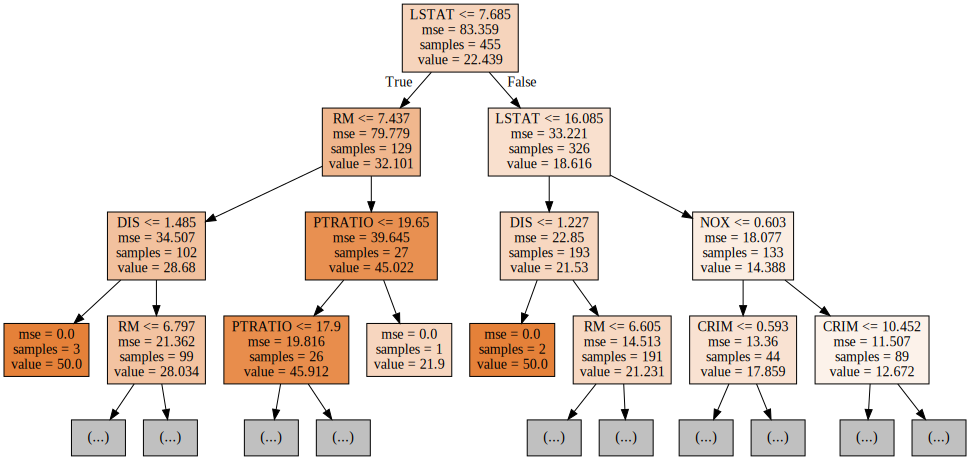

In [5]:
import graphviz
from sklearn.tree import export_graphviz

g = export_graphviz(reg,
                    feature_names=boston["feature_names"],
                    filled=True, # filled 對種類用顏色區分
                    max_depth=3) 

graphviz.Source(g)

## 決策樹分析:
    有錢人
        RM：住宅的平均房間數
        PTRATIO：城鎮學生教師比例
        CRIM：人均犯罪率

        LSTAT：低收入人群比例
        CRIM：人均犯罪率
        DIS：到 5 個波士頓就業中心的延長距離

In [6]:
pre

array([23.94      , 33.75      , 20.83571429, 27.1       , 18.45172414,
       33.0047619 , 18.45172414, 15.36896552, 14.82777778, 33.0047619 ,
       20.83571429, 26.3375    , 23.94      , 23.94      , 23.94      ,
       18.93333333, 35.2       ,  8.32941176, 20.83571429, 20.83571429,
       33.0047619 , 28.3       , 49.7       , 20.83571429, 29.26666667,
       28.3       , 26.3       , 11.6       , 20.83571429, 20.83571429,
       20.83571429,  8.32941176, 23.94      , 23.94      , 33.78      ,
       33.75      , 14.82777778, 14.82777778, 33.0047619 , 20.83571429,
       23.94      , 45.13333333, 32.9       , 20.83571429, 20.83571429,
       33.0047619 , 13.32      , 23.94      ,  8.32941176, 26.3       ,
       18.45172414])

In [7]:
from sklearn.metrics import r2_score

r2_score(y_test, pre)

0.8316793532987893

## MSA、RMSE、MAE、R-score 衡量模型好壞，參數影響好壞

In [8]:
from sklearn.metrics import mean_squared_error  # 均方誤差
from sklearn.metrics import mean_absolute_error # 平方絕對誤差
from sklearn.metrics import r2_score            # R square

print("MSE: ", mean_squared_error(y_test, pre))
print("RMSE: ", mean_squared_error(y_test, pre) ** 0.5)
print("MAE: ", mean_absolute_error(y_test, pre))
print("R-score: ", r2_score(y_test, pre))

MSE:  15.6711466214701
RMSE:  3.9586799089431444
MAE:  2.9297047854526084
R-score:  0.8316793532987893


## MSE、RMSE、MAE、R2
    MSE       單位 不明，會放大差異性，方向一致。
    RMSE      單位 幣值，放大差異性後，在縮小，方向一致。
    MAE       單位 幣值，不會放大，方向一致。
    R-Square  介於 0 ~ 1 誤差，數字越大越準，老師認為 0.5 以上算不錯的。

# 重點回顧及整理:
        classification-Tree 分類樹
            gini系數 平均出錯率
            過擬合、欠擬合
            可解釋性
            
        regression-Tree 回歸樹
            MSE 肯定性、信心程度
            過擬合 (利用 r-score 觀察出來的)
            可解釋性
            r-score 可以比較多好，知道有多精準。
            
        mse、mae 無法去比較、無法知道多好
        max_depth 多次調整參數，觀看

## 技術網站參考
[均方誤差 MSE (Mean-Square Error)](https://staruphackers.com/%E4%BB%80%E9%BA%BC%E6%98%AF%E5%9D%87%E6%96%B9%E8%AA%A4%E5%B7%AE-mean-square-error-mse%EF%BC%9F/)

[均方根誤差 RMSE (Root-Mean-Square Error)](https://staruphackers.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E4%B8%AD%E5%B8%B8%E7%94%A8%E6%96%BC%E9%A0%90%E6%B8%AC%E8%AA%A4%E5%B7%AE%E7%9A%84%E8%A9%95%E5%83%B9%E5%87%BD%E6%95%B8-evaluation-function/)

[平均絕對誤差 MAE (Mean Absolute Error)](https://staruphackers.com/%e4%bb%80%e9%ba%bc%e6%98%af%e5%b9%b3%e5%9d%87%e7%b5%95%e5%b0%8d%e8%aa%a4%e5%b7%ae-mean-absolute-error-mae%ef%bc%9f/)

[介紹2](https://blog.csdn.net/skullFang/article/details/79107127)
[介紹3](https://blog.csdn.net/u012735708/article/details/84337262)
[介紹4](https://zhuanlan.zhihu.com/p/66890032)
[回歸樹介紹5](https://www.jamleecute.com/regression-tree-%E8%BF%B4%E6%AD%B8%E6%A8%B9-bagging-bootstrap-aggrgation-r%E8%AA%9E%E8%A8%80/)
[介紹6](https://zhuanlan.zhihu.com/p/76469895)
[介紹7](https://www.jishuwen.com/d/pfJj/zh-tw)
[介紹8](https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-5%E8%AC%9B-%E6%B1%BA%E7%AD%96%E6%A8%B9-decision-tree-%E4%BB%A5%E5%8F%8A%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97-random-forest-%E4%BB%8B%E7%B4%B9-7079b0ddfbda)
[介紹9](https://ithelp.ithome.com.tw/articles/10199576)
[公式](https://blog.csdn.net/u012735708/article/details/84337262)
[擴充知識 dask.org ](https://dask.org/)